### Testear Late Fusion

In [1]:
import importlib
import subprocess
import sys

def check_and_install(package, version=None):
    """
    Check whether a package is installed. If not, install it.

    Args:
        package (str): Nombre del paquete.
        version (str): Package version to install (optional).
    """
    try:
        importlib.import_module(package)
        print(f"Package '{package}' is already installed.")
    except ImportError:
        print(f"Instalando '{package}'...")
        if version:
            subprocess.check_call([sys.executable, "-m", "pip", "install", f"{package}=={version}"])
        else:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", package])

check_and_install("ultralytics", "8.3.37")
check_and_install("ray[tune]")

El paquete 'ultralytics' ya está instalado.
Instalando 'ray[tune]'...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 66.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 MB 56.6 MB/s eta 0:00:0000:0100:01



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
import os

BASE_PATH = "/Users/matias/Downloads/PROYECTO_FINAL_VA"

os.chdir(BASE_PATH)

In [2]:
from src.pipeline import run_experiment
import logging
import os
from src.utils.control_log import define_n_log
from src.utils.trasform_ruth_module import modularization_ruth

args = {
    "model":"configs/models/yolov11_late_fusion_3.py",
    "data":"configs/data_params/data_LATE_FUSION.py"
}

data_create = True

train_model = False

logging.basicConfig(
    level=logging.DEBUG,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler(os.path.join(os.path.join("..", "PROYECTO_FINAL_VA", "logs"), define_n_log())),
    ]
)

if __name__ == "__main__":
    model_used = modularization_ruth(args["model"])
    data_used = modularization_ruth(args["data"])

    run_experiment(model_used, data_used, BASE_PATH, data_create, train_yolo=train_model)

Todo el contenido de la carpeta 'dataset_div' ha sido eliminado.
Archivo eliminado: src/TERM_l_f.yaml
Archivo eliminado: src/IMGS_l_f.yaml
División del dataset completada.



0: 512x640 3 deers, 156.5ms
Speed: 5.3ms preprocess, 156.5ms inference, 6.1ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 3 deers, 127.3ms
Speed: 3.1ms preprocess, 127.3ms inference, 0.3ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 4 horses, 115.0ms
Speed: 3.1ms preprocess, 115.0ms inference, 0.3ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 4 horses, 117.8ms
Speed: 1.8ms preprocess, 117.8ms inference, 0.4ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 3 horses, 135.7ms
Speed: 4.3ms preprocess, 135.7ms inference, 0.4ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 3 horses, 149.0ms
Speed: 2.5ms preprocess, 149.0ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 3 horses, 157.1ms
Speed: 4.1ms preprocess, 157.1ms inference, 0.4ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 3 horses, 121.6ms
Speed: 4.0ms preprocess, 121.6ms inference, 0.4ms postprocess per image at s

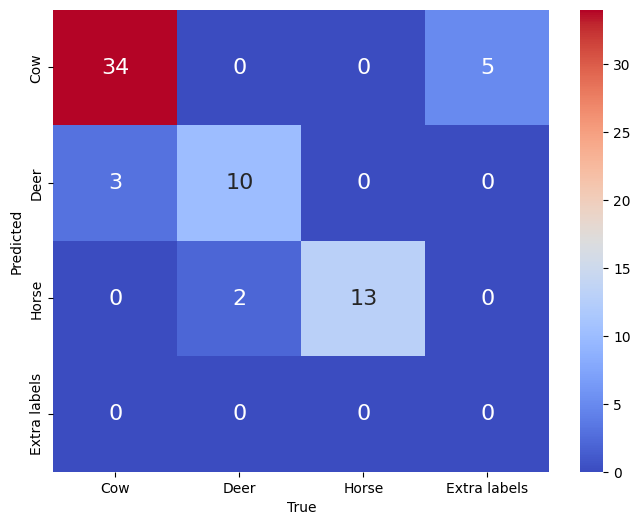

In [3]:
from ultralytics import YOLO
from src.yolo.funcs_yolov11 import *

model_normal = YOLO("compare_model_metrics/yolov11_RGB/model/yolov11_RGB.pt")
model_thermal = YOLO("compare_model_metrics/yolov11_THERM/model/yolov11_THERM.pt")

evaluate_model_late(model_normal, model_thermal, BASE_PATH+"/src/IMGS_l_f.yaml", BASE_PATH+"/src/TERM_l_f.yaml", 0.6, max_distance=100, conf_threshold=0.45,
                    path_save=BASE_PATH+"/late_fusion_confusion.pdf")